In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


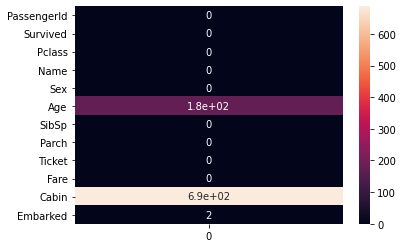

In [4]:
sns.heatmap(train.isnull().sum().to_frame(),annot=True)


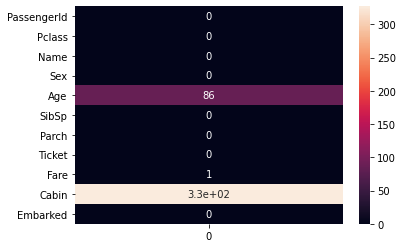

In [5]:
sns.heatmap(test.isnull().sum().to_frame(),annot=True)


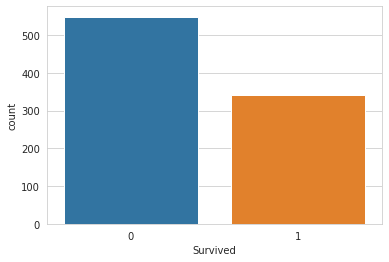

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

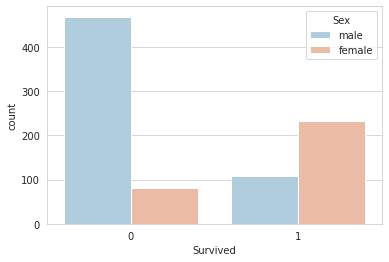

In [7]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')


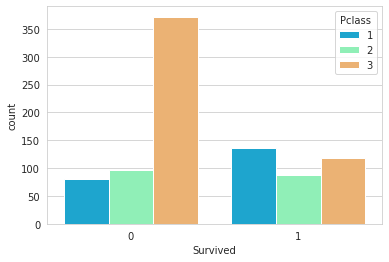

In [8]:
sns.countplot(x='Survived',data=train,hue='Pclass',palette='rainbow')


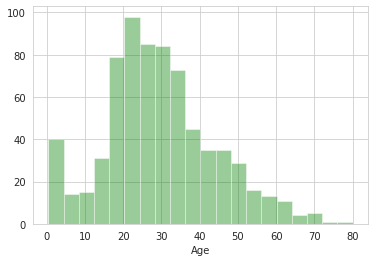

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,color='green',bins=20)


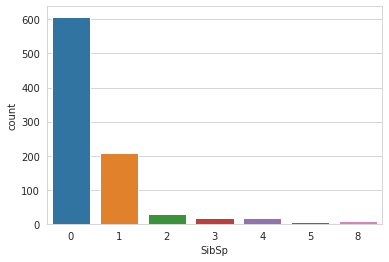

In [10]:
sns.countplot(x='SibSp',data=train)


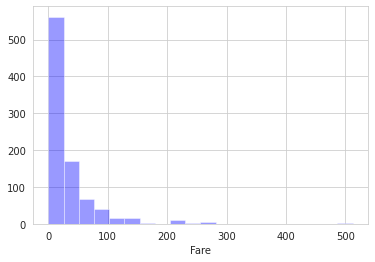

In [11]:
sns.distplot(train['Fare'].dropna(),kde=False,color='blue',bins=20)


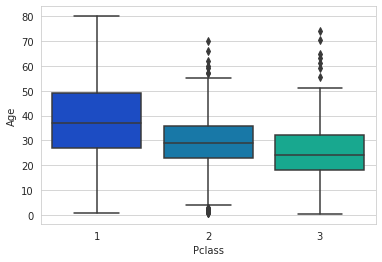

In [12]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


In [13]:
train.loc[train['Age'].isna(),'Age'] =train.loc[train['Age'].notna(),'Age'].median()
train.drop('Cabin',axis=1,inplace=True)


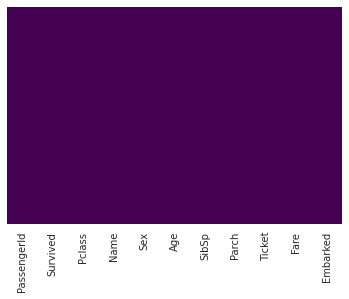

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [15]:
pd.get_dummies(train['Embarked'],drop_first=True).head()
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [16]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [17]:
train=pd.concat([train,sex,embark],axis=1)

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [18]:
train.drop('Survived',axis=1).head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(train.drop('Survived',axis=1),
                                               train['Survived'], test_size=0.30,
                                               random_state=1)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  
  print('[0]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[1]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return  tree, forest

In [22]:
#Get and train all of the models
model = models(x_train,y_train)

[0]Decision Tree Classifier Training Accuracy: 1.0
[1]Random Forest Classifier Training Accuracy: 0.9791332263242376


In [23]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(x_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()# Print a new line

[[127  26]
 [ 40  75]]
Model[0] Testing Accuracy = "0.753731343283582 !"

[[139  14]
 [ 46  69]]
Model[1] Testing Accuracy = "0.7761194029850746 !"



In [24]:
#Print Prediction of Random Forest Classifier model
pred = model[1].predict(x_test)
print(pred)

#Print a space
print()

#Print the actual values
print(y_test)

[1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 0 0 0 0]

862    1
223    0
84     1
680    0
535    1
      ..
247    1
551    0
239    0
484    1
92     0
Name: Survived, Length: 268, dtype: int64


In [25]:
my_survival = [[1,3,22.0,1,0,7.2500,1,0,1]]
pred = model[0].predict(my_survival)
print(pred)

if pred == 0:
  print("Oh no! You didn't make it")
else:
  print('Nice! You survived')

[0]
Oh no! You didn't make it


In [26]:
my_survival = [[3,3,26.0,0,0,7.9250,0,0,1]]
pred = model[0].predict(my_survival)
print(pred)

if pred == 0:
  print("Oh no! You didn't make it")
else:
  print('Nice! You survived')

[1]
Nice! You survived
